**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/suddharshan/historical-stock-price-of-10-popular-companies?select=Microsoft.csv

#**About Dataset**
**Context**
The subject matter of this dataset contains the stock prices of the 10 popular companies ( Apple, Amazon, Netflix, Microsoft, Google, Facebook, Tesla, Walmart, Uber and Zoom)

**Content**
Within the dataset one will encounter the following:
The date - "Date"
The opening price of the stock - "Open"
The high price of that day - "High"
The low price of that day - "Low"
The closed price of that day - "Close"
The amount of stocks traded during that day - "Volume"
The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"
Time period - 2015 to 2021 (day level)

**Tasks**
1. Exploratory Data Analysis
2. Tell a visualization story
3. Compare stock price growth between companies
4. Stock price prediction
5. Time series analysis

In [2]:
train_data = pd.read_csv('Microsoft.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,46.660000,47.419998,46.540001,46.759998,41.193840,27913900
1,2015-01-05,46.369999,46.730000,46.250000,46.330002,40.815037,39673900
2,2015-01-06,46.380001,46.750000,45.540001,45.650002,40.215973,36447900
3,2015-01-07,45.980000,46.459999,45.490002,46.230000,40.726925,29114100
4,2015-01-08,46.750000,47.750000,46.720001,47.590000,41.925045,29645200


1. Open is the opening price
2. High is the highest transaction price on that day
3. Low is the lowest transaction price on that day
4. Close is the Closing Price
5. Adj Close is an accurate Closing price
6. Volume is the closing price of shares that has been amended to include any distribution/corporate action that occurs before the next opening day



**Check missing values**

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1761 non-null   float64
 2   High       1761 non-null   float64
 3   Low        1761 non-null   float64
 4   Close      1761 non-null   float64
 5   Adj Close  1761 non-null   float64
 6   Volume     1761 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.4+ KB


- train.info pada dataset Microsoft tidak mempunyai missing value Karena semua panjang data nya sama
- (train.info in the Microsoft dataset doesn't have a missing value because all the data lengths are the same)

**Check statistic vales for every features**

- train_data.describe() digunakan untuk mengecek nilai median, mean,std,nilai min dan max serta persetase dari 25%, 50%, & 75%. pada datasets Microsoft ini diperoleh untuk masing masing nilainya dapat dilihat dibawah ini:
- (train_data.describe() is used to check the median, mean, std, min and max values and percentages of 25%, 50%, & 75%. in Microsoft's datasets obtained for each value can be seen below:)

In [4]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,124.677956,125.841812,123.491261,124.746269,121.222532,2.991662e+07
std,79.037039,79.783672,78.305072,79.115307,80.389635,1.416212e+07
min,40.340000,40.740002,39.720001,40.290001,35.590923,7.425600e+06
25%,57.880001,58.090000,57.450001,57.889999,53.343620,2.138430e+07
50%,101.099998,101.860001,99.629997,101.120003,97.076530,2.640770e+07
75%,174.110001,175.059998,170.820007,174.050003,171.117706,3.397970e+07
max,344.619995,349.670013,342.200012,343.109985,343.109985,1.691640e+08


**Handle datetime data for time series**

- time series berkaitan dengan datetime Dan dijadikan sebagai acuannya. Sehingga train_data['Date'] digunakan untuk menambahkan tabel date pada table sebelumnya agar ketika ditraining maka otomatis akan terbaca data date. Kemudian dijadikan index dimana bentuknya yaitu hari, bulan & tahun.
- (time series is related to datetime and is used as a reference. So train_data['Date'] is used to add a date table to the previous table so that when trained it will automatically read the data date. Then it is used as an index where the form is day, month & year).

In [5]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.193840,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.815037,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.215973,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.726925,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.925045,29645200


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

- Dari plot dibawah ini dapat diketahui bahwa closing price yang terjadi dalam 7 tahun ini yaitu yang dimulai pada tahun 2015-2022 memiliki Trend nya naik atau memiliki kecendungan naik.
- (From the plot below it can be seen that the closing prices that have occurred in the past 7 years starting in 2015-2022 have an upward trend or have an upward trend/ trend up.)

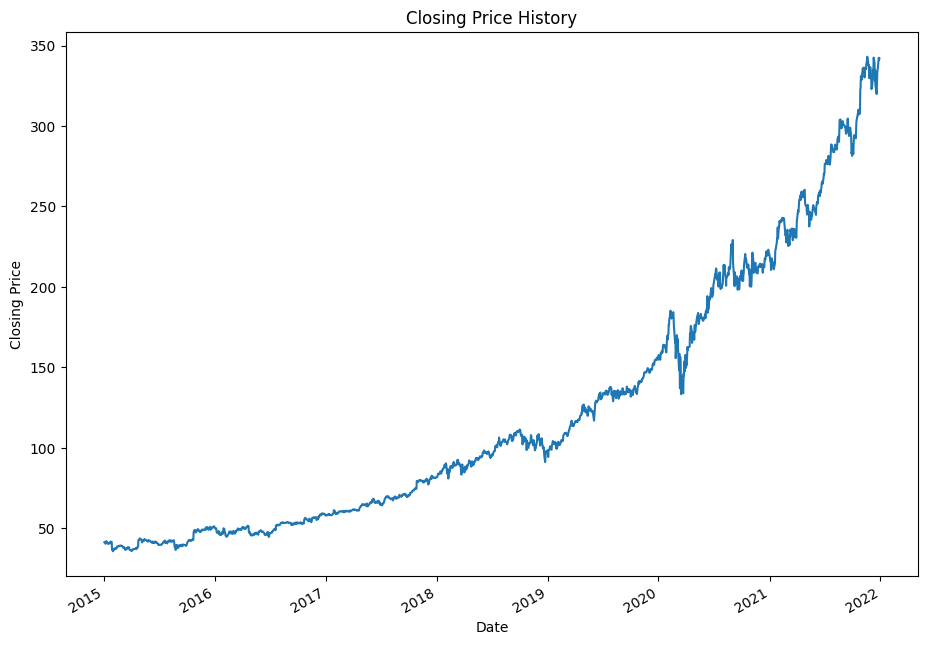

In [6]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

- Mengecek trend untuk data 'Open', 'Close', 'Volume', 'High', 'Low' . Dimana pada diagram plot dibawah ini dapat kita lihat bahwa open,close,high Dan low juga memiliki kecenderungan atau trend yang naik. namun pada diagram plot untuk data volume datanya mengalami naik turun.
- (check trend for data 'Open', 'Close', 'Volume', 'High', 'Low' . Where in the plot diagram below we can see that open, close, high and low also have an upward trend or trend. but in the plot diagram for the data the volume of the data fluctuates.)

<Figure size 1600x800 with 0 Axes>

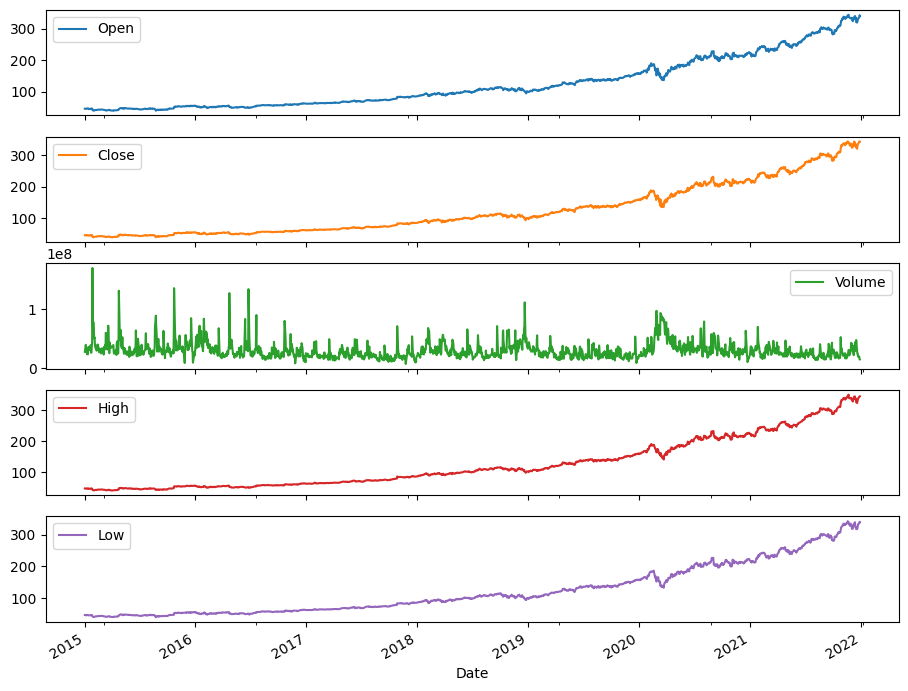

In [7]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

- Coding dibwah ini digunakan untuk membaca harga terendah dan harga tertinggi dan membaca harga penutupan dan pembukaannya. Membuatnya dalam bentuk persentasenya yang kemudian akan dimasukkan kedalam dataset nya.
- (The coding below is used to read the lowest and highest prices and read the closing and opening prices. Make it in the form of a percentage which will then be included in the dataset.)

In [8]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [9]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

- pada coding diwah ini harga penutupan saham dijadikan sebagai label untuk melakukan forecasting
- in the coding below, the closing price of the stock is used as a label for forecasting

In [10]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

89


<ipython-input-10-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Mengimpor Library untuk modelnya

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

- scaler untuk normalisasi data karena datanya memiki ukuran yang berbeda dan intervalnya cukup jauh yaitu berkisar ribuan, ratus ribuan. hal ini  digunakan agar harga range nya tidak terlalu jauh atau lama.
- scaler for data normalization because the data has different sizes and the intervals are quite far, namely around thousands, hundreds of thousands. this is used so that the price range is not too far or long.

In [12]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-12-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


- Melakukan slicing dengan menentukan x Dan y dimana y diambil dari data label
- Doing slicing by determining x and y where y is taken from the label data

In [13]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [14]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-14-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


- Melakukan splitting untuk train dan testnya menggunakan  2 model yaitu LinearRegression dan RandomForest
- Doing splitting for train and test using 2 models, namely LinearRegression and RandomForest

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Melakukan train dengan 86400 detik

In [18]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-18-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-18-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-18-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

- Pada diagram plot dibwah ini garis naik turun berwarna orange merupakan hasil prediksi atau peramalan untuk beberapa bulan kedepan.
- In the plot diagram below, the orange rising and falling lines are the results of predictions or forecasting for the next few months. We can see that the forecast has an upward trend

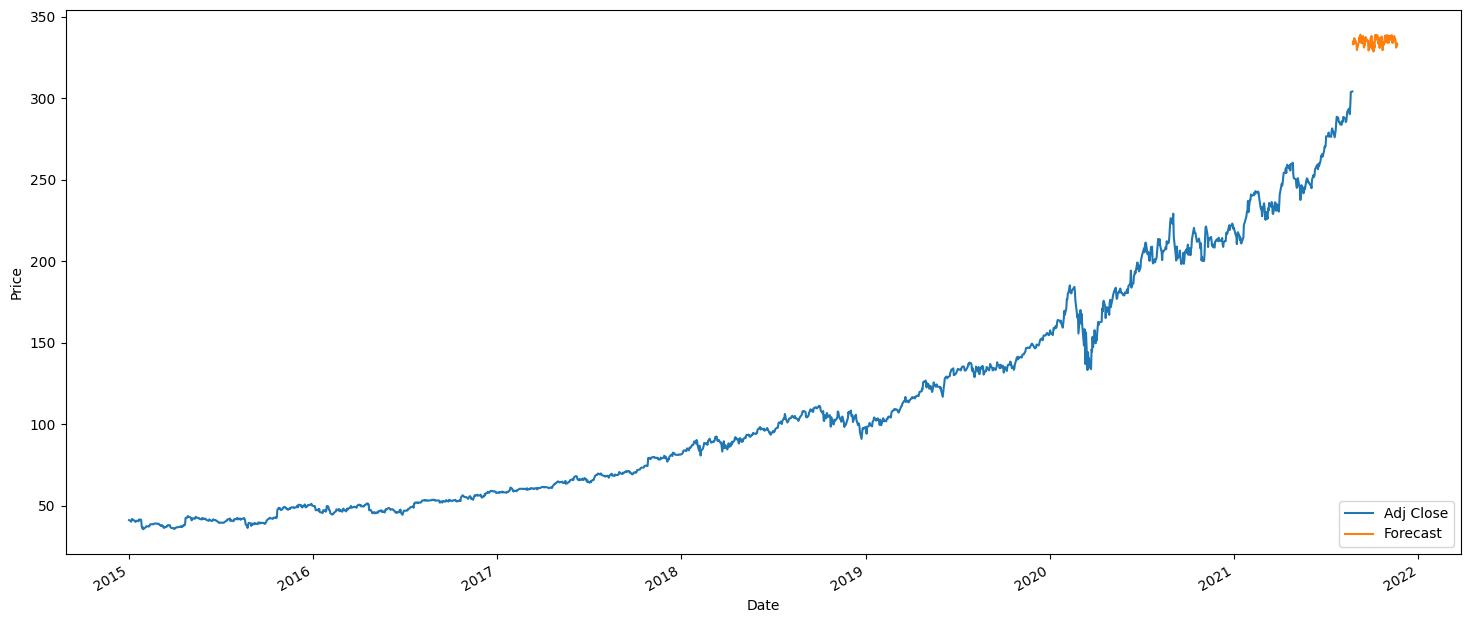

In [22]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **Clustering**

<ipython-input-89-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


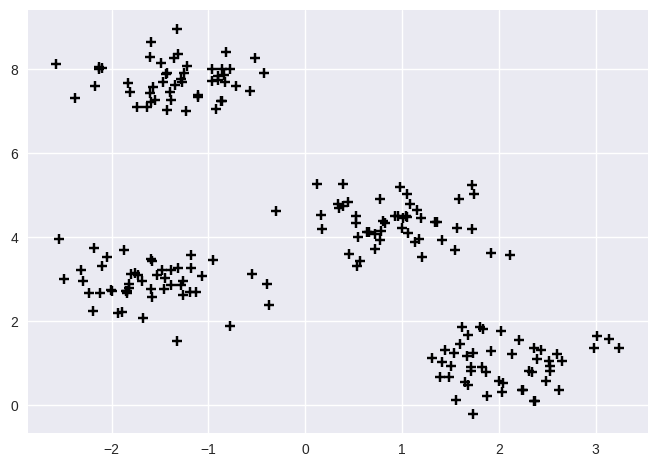

In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()

In [90]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

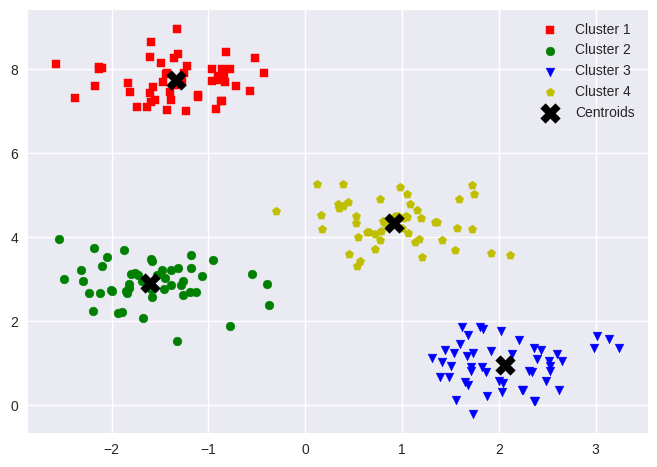

In [91]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()

**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

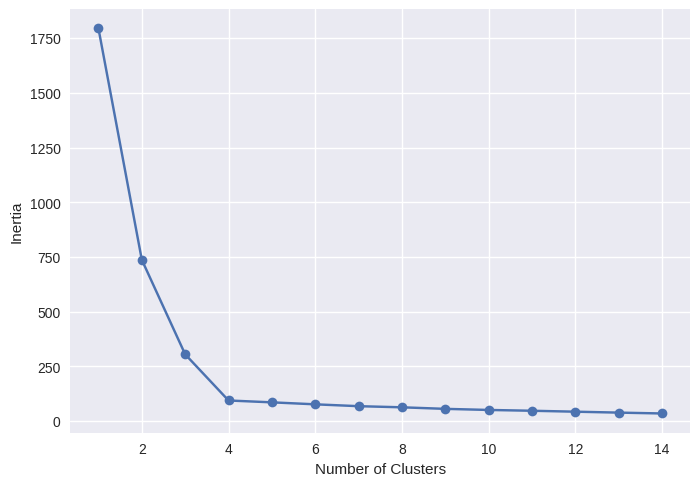

In [92]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Another example for KMeans

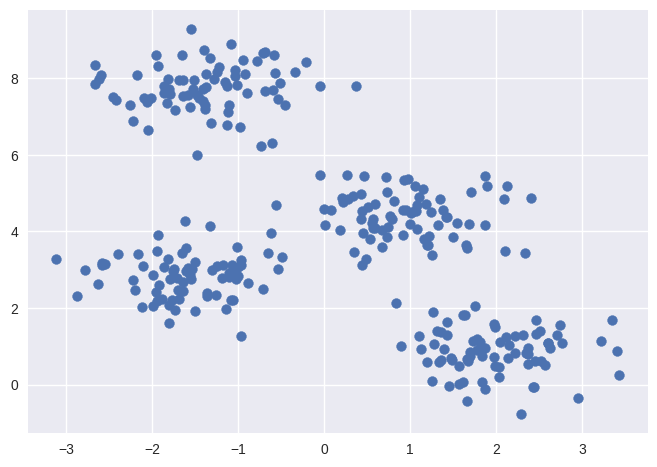

In [93]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

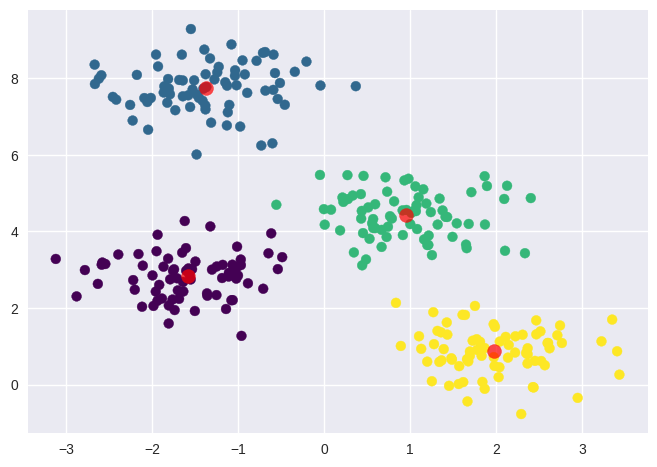

In [95]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [97]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

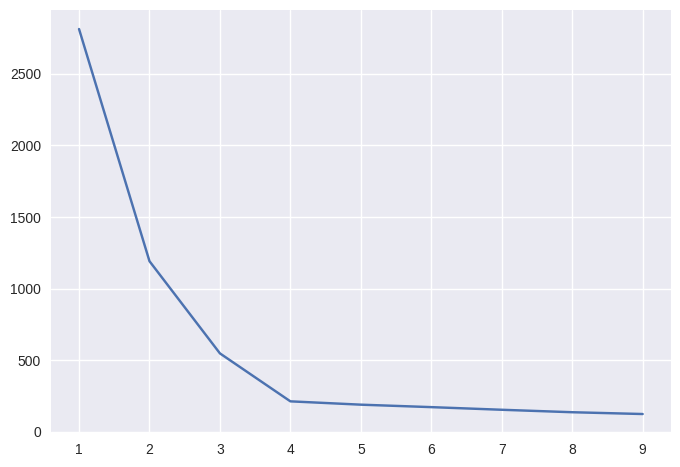

In [98]:
plt.plot(range(1,10),inersia)
plt.show()

KMean6 with 6 cluster

In [99]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


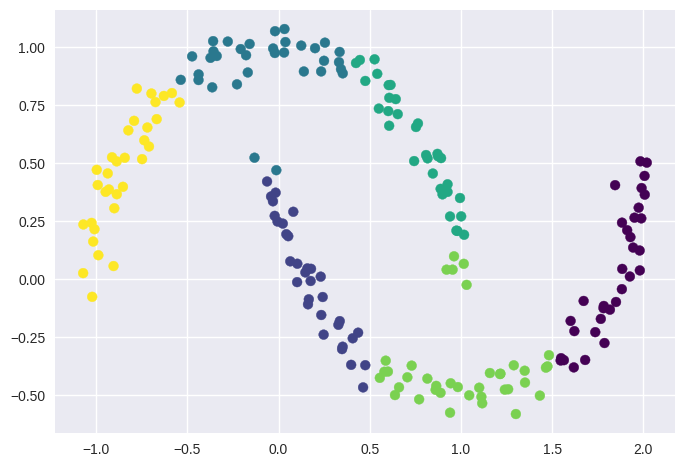

In [100]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

**Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


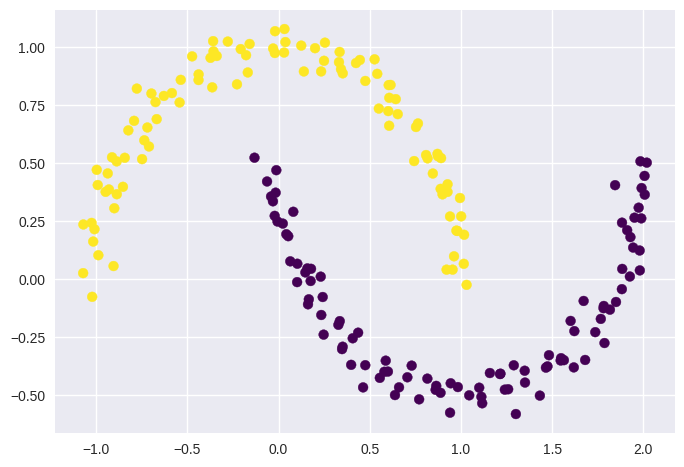

In [101]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**DBScan**

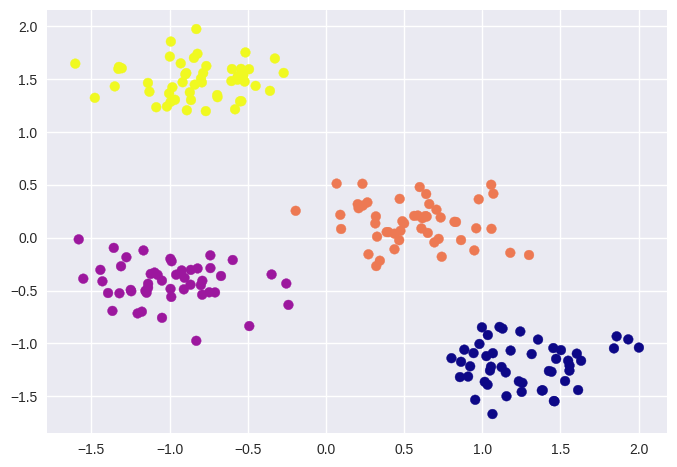

In [102]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


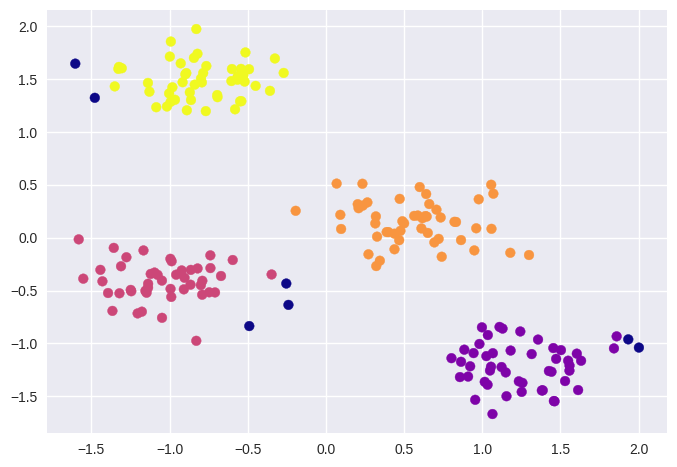

In [103]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()